<a href="https://colab.research.google.com/github/christinaxliu/research/blob/main/Caltech-JPL-Intern/HRDiagramGen/NASAExoplanetArchive/HRDiagramGen_NASAExoplanetArchive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
# Colab Notebook to plot Hertzsprung–Russell diagram based on stellar hosts data from NASA Exoplanet Archive:
# https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=STELLARHOSTS

from __future__ import division

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive

In [28]:
pd.options.mode.copy_on_write = True

In [26]:
# Constants and methods for plotting graphs

# Mapping from star's spectral class to the corresponding color in the plotting graph
spectral_class_color = {
    'O': 'blue',
    'B': 'deepskyblue',
    'A': 'white',
    'F': 'lightyellow',
    'G': 'yellow',
    'K': 'orange',
    'M': 'red'
}

# Mapping from star's spectral class to the corresponding legend title in the plotting graph
spectral_class_label = {
    'O': 'Spectral Class: O',
    'B': 'Spectral Class: B',
    'A': 'Spectral Class: A',
    'F': 'Spectral Class: F',
    'G': 'Spectral Class: G',
    'K': 'Spectral Class: K',
    'M': 'Spectral Class: M'
}

# Plotting seleted stars
def plot_selected_stars(ax, #axes object for plotting graph
                        stellar_data, # DataFrame object that contains stars data
                        x_field, # The data field for x axis
                        y_field, # The data field for y axis
                        is_selected, # Whether the current data entry is selected or not
                        is_x_as_int, # Whether to use the x axis value as integer or not
                        color, # Color for the data points in the graph
                        edgecolors, # Egde color for the data points in the graph
                        label, # Legend lable for the data points in the graph
                        size # Size of legend lable for the data points in the graph
                        ):
    if is_x_as_int:
        x = stellar_data[x_field][is_selected].astype(int)
    else:
        x = stellar_data[x_field][is_selected]
    y = stellar_data[y_field][is_selected]

    ax.scatter(x=x,
               y=y,
               c=color,
               s=size,
               edgecolors=edgecolors,
               label=label)

# Plotting seleted stars with sizeable circles in propotion to the stars' radii
def plot_selected_stars_with_size(ax, #axes object for plotting graph
                                  stellar_data, # DataFrame object that contains stars data
                                  x_field, # The data field for x axis
                                  y_field, # The data field for y axis
                                  size_field, # The data field for the star size
                                  is_selected, # Whether the current data entry is selected or not
                                  is_x_as_int, # Whether to use the x axis value as integer or not
                                  color, # Color for the data points in the graph
                                  edgecolors, # Egde color for the data points in the graph
                                  label, # Legend lable for the data points in the graph
                                  scale_size # The propotion to scale the cirle for the star in the graph
                                  ):
    ''' b: boolean Series to make the selection
        c: Color
        label: for the legend
    '''
    if is_x_as_int:
        x = stellar_data[x_field][is_selected].astype(int)
    else:
        x = stellar_data[x_field][is_selected]
    y = stellar_data[y_field][is_selected]
    size = stellar_data[size_field][is_selected] * scale_size

    ax.scatter(x=x,
               y=y,
               c=color,
               s=size,
               edgecolors=edgecolors,
               label=label)

# Plotting stars
def plot_stars(ax, stellar_data, x_field, y_field, spectral_field, is_x_as_int, size, edgecolors):
    for spectral_class in spectral_class_label:
        plot_selected_stars(ax=ax,
                            stellar_data=stellar_data,
                            x_field=x_field,
                            y_field=y_field,
                            is_selected=stellar_data[spectral_field].map(lambda x: x[0].upper() == spectral_class),
                            is_x_as_int=is_x_as_int,
                            color=spectral_class_color[spectral_class],
                            edgecolors=edgecolors,
                            label=spectral_class_label[spectral_class],
                            size=size)

# Plotting stars with sizeable circles in propotion to the stars' radii
def plot_stars_with_size(ax, stellar_data, x_field, y_field, size_field, spectral_field, is_x_as_int, scale_size, edgecolors):
    for spectral_class in spectral_class_label:
        plot_selected_stars_with_size(ax=ax,
                                      stellar_data=stellar_data,
                                      x_field=x_field,
                                      y_field=y_field,
                                      size_field=size_field,
                                      is_selected=stellar_data[spectral_field].map(lambda x: x[0].upper() == spectral_class),
                                      is_x_as_int=is_x_as_int,
                                      color=spectral_class_color[spectral_class],
                                      edgecolors=edgecolors,
                                      label=spectral_class_label[spectral_class],
                                      scale_size=scale_size)

# Set legend with fixed size
def set_legend_size(legend, legend_count, legend_size):
    for i in range (legend_count):
        legend.legend_handles[i]._sizes = [legend_size]

In [29]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:
# Load the stellar hosts data from the csv file. Each stellar host is represented as a row entry in the csv file,
# with four data fields:
#     hostname: Host Name,
#     st_spectype: Spectral Type,
#     st_teff: Stellar Effective Temperature [K],
#     st_rad: Radius [Solar Radius],
#     st_lum: Stellar Luminosity [log(Solar)]
#     sy_dist: Distance [pc],
#     sy_bmag: B (Johnson) Magnitude,
#     sy_vmag: V (Johnson) Magnitude
#
# To run the program, upload the stellar hosts data csv file into the Google dirve and change the following filename path accordingly.
stellar_hosts_filename = '/content/drive/My Drive/Colab Notebooks/NASAExoplanetArchive_STELLARHOSTS.csv'
stellar_hosts_data = pd.read_table(stellar_hosts_filename,
                                   skiprows=15,
                                   sep=',',
                                   header=None,
                                   index_col=None,
                                   names = ['hostname', 'st_spectype', 'st_teff', 'st_rad', 'st_lum', 'sy_dist', 'sy_bmag', 'sy_vmag'],
                                   skipfooter=0,
                                   engine='python')

In [31]:
# Sanity check the first several rows of data to ensure data is read correctly
stellar_hosts_data.head()

,hostname,st_spectype,st_teff,st_rad,st_lum,sy_dist,sy_bmag,sy_vmag
0,11 Com B,NaN,4415.0,0.63,-0.874,100.1580,NaN,12.61700
1,11 Com,G8 III,4742.0,19.00,2.243,93.1846,5.726,4.72307
2,11 Com,K0 III,4705.0,15.78,2.039,93.1846,5.726,4.72307
3,11 Com,NaN,NaN,NaN,NaN,93.1846,5.726,4.72307
4,11 Com,NaN,4755.0,17.18,2.133,93.1846,5.726,4.72307


In [32]:
# Sanity check the last several rows of data to ensure data is read correctly.
stellar_hosts_data.tail()

,hostname,st_spectype,st_teff,st_rad,st_lum,sy_dist,sy_bmag,sy_vmag
44431,xi Aql,NaN,4714.0,NaN,NaN,56.1858,5.761,4.70964
44432,xi Aql,NaN,4780.0,12.00,1.839,56.1858,5.761,4.70964
44433,xi Aql,NaN,4805.2,9.81,NaN,56.1858,5.761,4.70964
44434,xi Aql,K0 III,4841.0,10.86,1.767,56.1858,5.761,4.70964
44435,xi Aql,K0,NaN,NaN,NaN,56.1858,5.761,4.70964


In [33]:
# Get the statistics about the data
stellar_hosts_data.describe()

,st_teff,st_rad,st_lum,sy_dist,sy_bmag,sy_vmag
count,36381.000000,35755.000000,8419.000000,43226.000000,42670.000000,43550.000000
mean,5446.549132,1.268234,-0.108625,683.527503,13.951977,13.123077
std,929.864215,2.620376,0.771350,751.243492,3.016907,2.985927
min,415.000000,0.010000,-4.660000,1.301190,0.011000,-0.010000
25%,5058.000000,0.790000,-0.460000,213.260000,12.737000,12.052000
50%,5594.000000,0.950000,-0.041000,565.752000,14.853000,14.081500
75%,5937.000000,1.190000,0.342000,935.191000,16.045000,15.238000
max,57000.000000,109.460000,3.460000,8800.000000,21.239000,45.340000


In [34]:
# Change any fields with empty spaces to NaN values so we could clean them up later on
stellar_hosts_data = stellar_hosts_data.applymap(
    lambda x: np.nan if isinstance(x, str) and x.isspace() else x)
stellar_hosts_data.describe()

,st_teff,st_rad,st_lum,sy_dist,sy_bmag,sy_vmag
count,36381.000000,35755.000000,8419.000000,43226.000000,42670.000000,43550.000000
mean,5446.549132,1.268234,-0.108625,683.527503,13.951977,13.123077
std,929.864215,2.620376,0.771350,751.243492,3.016907,2.985927
min,415.000000,0.010000,-4.660000,1.301190,0.011000,-0.010000
25%,5058.000000,0.790000,-0.460000,213.260000,12.737000,12.052000
50%,5594.000000,0.950000,-0.041000,565.752000,14.853000,14.081500
75%,5937.000000,1.190000,0.342000,935.191000,16.045000,15.238000
max,57000.000000,109.460000,3.460000,8800.000000,21.239000,45.340000


In [35]:
# Clean up data - drop off rows that contain NaN values
stellar_hosts_data = stellar_hosts_data.dropna()
stellar_hosts_data.describe()

,st_teff,st_rad,st_lum,sy_dist,sy_bmag,sy_vmag
count,817.000000,817.000000,817.000000,817.000000,817.000000,817.000000
mean,4937.425337,2.989780,-0.152827,120.475069,10.346492,9.393311
std,1312.581362,7.831855,1.136599,190.747231,3.255335,3.027218
min,2900.000000,0.140000,-2.810000,1.301190,0.072000,0.872000
25%,3913.000000,0.620000,-1.056000,20.512100,7.969000,7.290000
50%,4943.000000,0.950000,-0.110000,50.480000,10.197000,9.139000
75%,5731.000000,1.560000,0.485000,121.375000,12.705000,11.496000
max,27730.000000,88.470000,3.261000,1539.710000,18.735000,17.670000


In [36]:
# Clean up data - drop off duplicate rows from the data (keyed by hostname)
stellar_hosts_data = stellar_hosts_data.drop_duplicates(subset=['hostname'])
stellar_hosts_data.describe()

,st_teff,st_rad,st_lum,sy_dist,sy_bmag,sy_vmag
count,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000
mean,5020.760030,3.181620,-0.090942,136.203906,10.475740,9.532604
std,1364.916283,8.478906,1.121461,204.842818,3.270926,3.081174
min,3036.000000,0.140000,-2.810000,1.301190,0.072000,0.872000
25%,4085.000000,0.670000,-0.886000,22.838600,8.149000,7.430000
50%,5020.000000,1.000000,-0.056000,58.110500,10.299000,9.220000
75%,5770.000000,1.590000,0.505000,143.125000,12.918000,11.937000
max,27730.000000,88.470000,3.261000,1539.710000,18.735000,17.670000


In [37]:
# Output the cleaned up data into csv file for analysis if needed
stellar_hosts_output_filename = '/content/drive/My Drive/Colab Notebooks/NASAExoplanetArchive_STELLARHOSTS_cleaned.csv'
stellar_hosts_data.to_csv(stellar_hosts_output_filename)

In [38]:
# Cast Effective Temperature, Luminosity, Distance, B Magnitude, and V Magnitude to float
stellar_hosts_data['st_teff'] = stellar_hosts_data['st_teff'].astype(float)
stellar_hosts_data['st_rad'] = stellar_hosts_data['st_rad'].astype(float)
stellar_hosts_data['st_lum'] = stellar_hosts_data['st_lum'].astype(float)
stellar_hosts_data['sy_dist'] = stellar_hosts_data['sy_dist'].astype(float)
stellar_hosts_data['sy_bmag'] = stellar_hosts_data['sy_bmag'].astype(float)
stellar_hosts_data['sy_vmag'] = stellar_hosts_data['sy_vmag'].astype(float)

In [39]:
# Calculate B-V color index for each stellar host
stellar_hosts_data['b-v_index'] = stellar_hosts_data['sy_bmag'] - stellar_hosts_data['sy_vmag']

# Sanity check several stellar hosts at the beginning rows to make sure B-V color indexes are calculated correctly
stellar_hosts_data.head()

,hostname,st_spectype,st_teff,st_rad,st_lum,sy_dist,sy_bmag,sy_vmag,b-v_index
1,11 Com,G8 III,4742.0,19.00,2.243,93.1846,5.726,4.72307,1.00293
20,14 And,K0 III,4813.0,11.00,1.763,75.4392,6.256,5.23133,1.02467
32,14 Her,K0V,5388.0,0.96,-0.155,17.9323,7.495,6.61935,0.87565
61,HIP 96895,G2V,5781.0,1.26,0.230,21.1389,6.604,5.96100,0.64300
74,16 Cyg B,G5V,5674.0,1.17,0.143,21.1397,6.876,6.21500,0.66100


In [40]:
# Calculate absolute magnitudes based on the formula in http://astronomy.swin.edu.au/cosmos/A/Absolute+Magnitude
stellar_hosts_data['abs_mag'] = stellar_hosts_data['sy_vmag'] - 5 * np.log10(stellar_hosts_data['sy_dist']/10.)

# Sanity check several stellar hosts at the beginning rows to make sure absolute magnitudes are calculated correctly
stellar_hosts_data.head()

,hostname,st_spectype,st_teff,st_rad,st_lum,sy_dist,sy_bmag,sy_vmag,b-v_index,abs_mag
1,11 Com,G8 III,4742.0,19.00,2.243,93.1846,5.726,4.72307,1.00293,-0.123651
20,14 And,K0 III,4813.0,11.00,1.763,75.4392,6.256,5.23133,1.02467,0.843345
32,14 Her,K0V,5388.0,0.96,-0.155,17.9323,7.495,6.61935,0.87565,5.351170
61,HIP 96895,G2V,5781.0,1.26,0.230,21.1389,6.604,5.96100,0.64300,4.335588
74,16 Cyg B,G5V,5674.0,1.17,0.143,21.1397,6.876,6.21500,0.66100,4.589506


In [41]:
stellar_hosts_data.describe()

,st_teff,st_rad,st_lum,sy_dist,sy_bmag,sy_vmag,b-v_index,abs_mag
count,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000,673.000000
mean,5020.760030,3.181620,-0.090942,136.203906,10.475740,9.532604,0.943136,5.596521
std,1364.916283,8.478906,1.121461,204.842818,3.270926,3.081174,0.719756,3.320591
min,3036.000000,0.140000,-2.810000,1.301190,0.072000,0.872000,-9.009000,-2.884888
25%,4085.000000,0.670000,-0.886000,22.838600,8.149000,7.430000,0.659000,3.561086
50%,5020.000000,1.000000,-0.056000,58.110500,10.299000,9.220000,0.935000,5.008268
75%,5770.000000,1.590000,0.505000,143.125000,12.918000,11.937000,1.336000,7.903008
max,27730.000000,88.470000,3.261000,1539.710000,18.735000,17.670000,5.222000,15.438296


In [42]:
# Count the number of spectral classes
spectral_classes = stellar_hosts_data['st_spectype'].map(lambda x: x[0].upper())
spectral_classes.value_counts()

st_spectype
G    219
K    202
M    164
F     76
A      9
B      3
Name: count, dtype: int64

In [43]:
# Keep the stellar hosts with OBAFGKM spectral classes
stellar_hosts_data = stellar_hosts_data[stellar_hosts_data['st_spectype'].map(lambda x: x[0].upper() in 'OBAFGKM')]

# Count the number of spectral classes
spectral_classes = stellar_hosts_data['st_spectype'].map(lambda x: x[0].upper())
spectral_classes.value_counts()

st_spectype
G    219
K    202
M    164
F     76
A      9
B      3
Name: count, dtype: int64

In [44]:
# Output the data for plot into csv file for analysis if needed
stellar_hosts_output_filename = '/content/drive/My Drive/Colab Notebooks/NASAExoplanetArchive_STELLARHOSTS_plot.csv'
stellar_hosts_data.to_csv(stellar_hosts_output_filename)

In [45]:
# Rows that do not meet the condition alpha + num are eliminated
i  = stellar_hosts_data['st_spectype'].apply(
    lambda x: (len(x) >= 2)  and (x[0].isalpha()) and (x[1].isdigit()))
stellar_data_with_spec_short = stellar_hosts_data[i]

# A new column is created with the first two characters from 'SpType'
stellar_data_with_spec_short['st_spec_short'] = stellar_data_with_spec_short['st_spectype'].apply(lambda x : x[0].upper() + x[1:2])

stellar_data_with_spec_short.head()

,hostname,st_spectype,st_teff,st_rad,st_lum,sy_dist,sy_bmag,sy_vmag,b-v_index,abs_mag,st_spec_short
1,11 Com,G8 III,4742.0,19.00,2.243,93.1846,5.726,4.72307,1.00293,-0.123651,G8
20,14 And,K0 III,4813.0,11.00,1.763,75.4392,6.256,5.23133,1.02467,0.843345,K0
32,14 Her,K0V,5388.0,0.96,-0.155,17.9323,7.495,6.61935,0.87565,5.351170,K0
61,HIP 96895,G2V,5781.0,1.26,0.230,21.1389,6.604,5.96100,0.64300,4.335588,G2
74,16 Cyg B,G5V,5674.0,1.17,0.143,21.1397,6.876,6.21500,0.66100,4.589506,G5


In [46]:
stellar_data_with_spec_short.describe()

,st_teff,st_rad,st_lum,sy_dist,sy_bmag,sy_vmag,b-v_index,abs_mag
count,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000
mean,4939.139539,3.408468,-0.082858,121.919485,10.226542,9.266991,0.959551,5.575005
std,1011.256836,8.897357,1.141590,196.219922,3.260271,3.045520,0.745322,3.359152
min,3036.000000,0.140000,-2.810000,1.301190,0.072000,0.872000,-9.009000,-2.884888
25%,4060.000000,0.670000,-0.917500,22.008700,7.778500,7.040000,0.677500,3.508370
50%,4958.000000,1.000000,-0.066000,52.064800,9.720000,8.933000,0.953000,5.019622
75%,5737.500000,1.600000,0.517500,117.296500,12.568500,11.477000,1.352500,7.977396
max,10170.000000,88.470000,3.261000,1539.710000,18.735000,16.999000,5.222000,15.438296


In [47]:
spec_code_map = {'O':'0', 'B':'1', 'A':'2', 'F':'3', 'G':'4', 'K':'5', 'M':'6'}
stellar_data_with_spec_short['st_spec_short'] = stellar_data_with_spec_short['st_spec_short'].apply(
    lambda x: spec_code_map[x[0]]+x[1])
stellar_data_with_spec_short.head()

,hostname,st_spectype,st_teff,st_rad,st_lum,sy_dist,sy_bmag,sy_vmag,b-v_index,abs_mag,st_spec_short
1,11 Com,G8 III,4742.0,19.00,2.243,93.1846,5.726,4.72307,1.00293,-0.123651,48
20,14 And,K0 III,4813.0,11.00,1.763,75.4392,6.256,5.23133,1.02467,0.843345,50
32,14 Her,K0V,5388.0,0.96,-0.155,17.9323,7.495,6.61935,0.87565,5.351170,50
61,HIP 96895,G2V,5781.0,1.26,0.230,21.1389,6.604,5.96100,0.64300,4.335588,42
74,16 Cyg B,G5V,5674.0,1.17,0.143,21.1397,6.876,6.21500,0.66100,4.589506,45


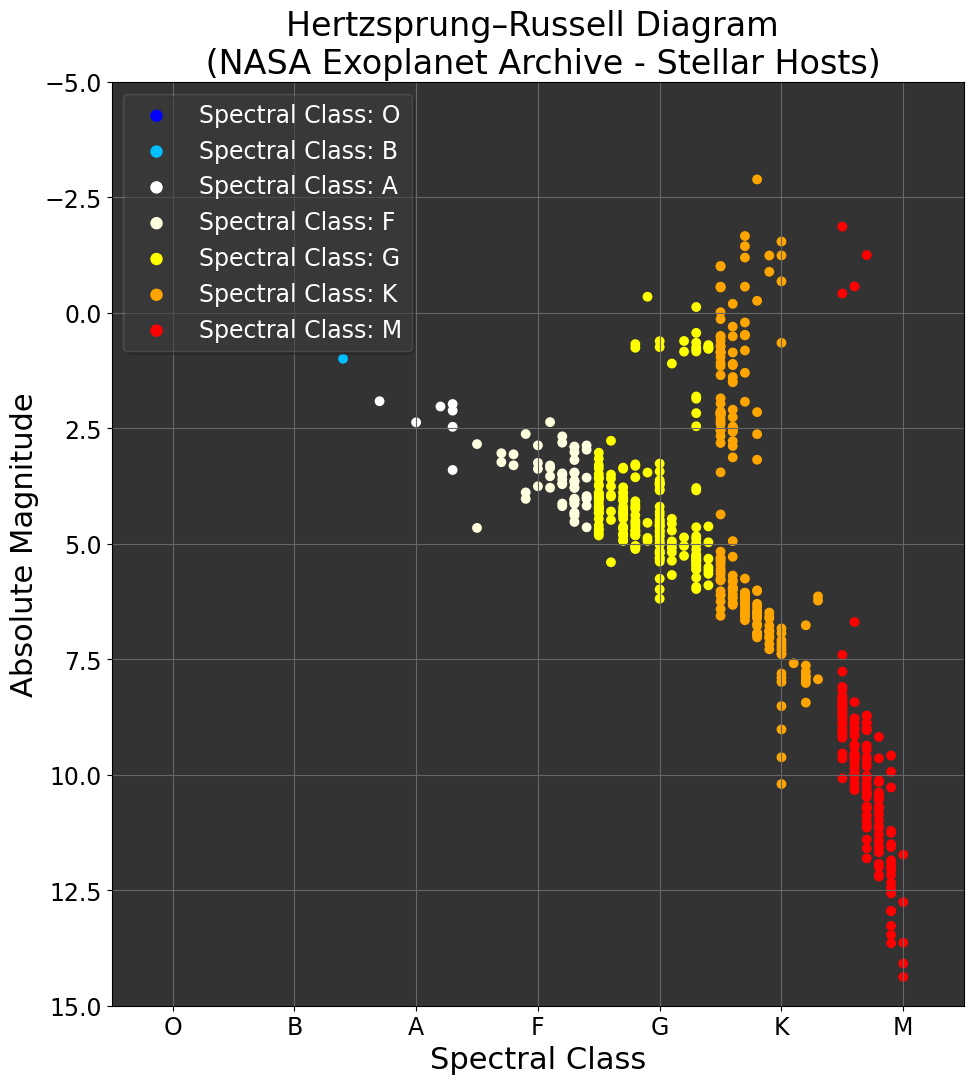

In [50]:
# Plot a H-R digram with Spectral Class as the x axis and Absolute Magnitude as the y axis

fig = plt.figure(figsize=(11,12))
ax = fig.add_subplot(111, facecolor='0.2')

ax.set_xlim(0, 70)
ax.set_ylim(15, -5)
ax.grid(color='0.4')
ax.set_title('Hertzsprung–Russell Diagram \n (NASA Exoplanet Archive - Stellar Hosts)')
ax.title.set_fontsize(24)
ax.set_xlabel('Spectral Class')
ax.xaxis.label.set_fontsize(22)
ax.set_ylabel('Absolute Magnitude')
ax.yaxis.label.set_fontsize(22)

plot_stars(ax=ax,
           stellar_data=stellar_data_with_spec_short,
           x_field='st_spec_short',
           y_field='abs_mag',
           spectral_field='st_spectype',
           is_x_as_int=True,
           size=50,
           edgecolors='none')

ax.set_xticks(range(5, 75, 10))
ax.set_xticklabels(['O', 'B', 'A', 'F', 'G', 'K', 'M'])
ax.tick_params(axis='both', labelsize=17)

legend = ax.legend(scatterpoints=1,
                   labelcolor='white',
                   loc='best',
                   fontsize = 17,
                   markerscale = 2,
                   shadow=True,
                   framealpha=0.15)
set_legend_size(legend, len(spectral_class_label), 80)

frame = legend.get_frame()
frame.set_facecolor('0.50')

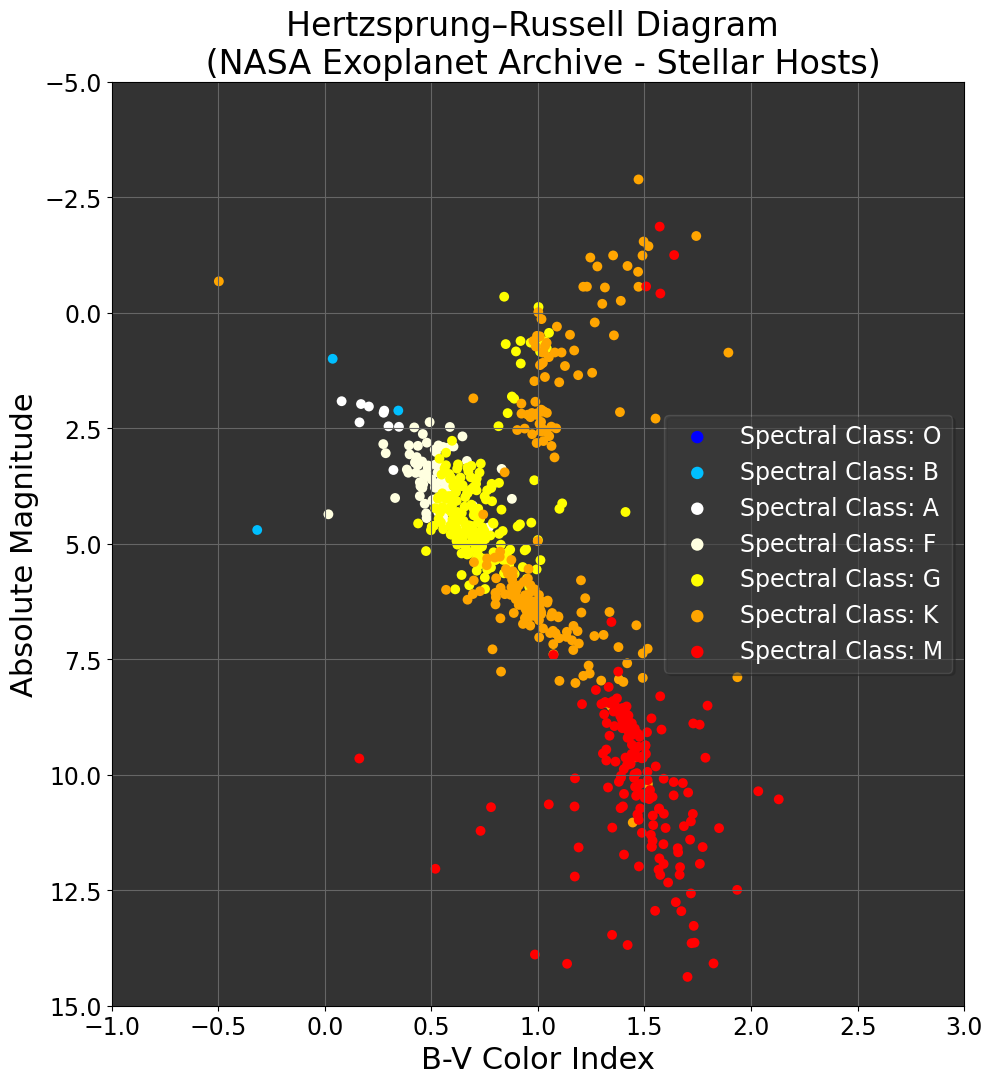

In [51]:
# Plot a H-R digram with B-V color index as the x axis and Absolute Magnitude as the y axis

fig = plt.figure(figsize=(11,12))
ax = fig.add_subplot(111, facecolor='0.2')

ax.set_xlim(-1.0, 3.0)
ax.set_ylim(15, -5)
ax.grid(color='0.4')
ax.set_title('Hertzsprung–Russell Diagram \n (NASA Exoplanet Archive - Stellar Hosts)')
ax.title.set_fontsize(24)
ax.set_xlabel('B-V Color Index')
ax.xaxis.label.set_fontsize(22)
ax.set_ylabel('Absolute Magnitude')
ax.yaxis.label.set_fontsize(22)

plot_stars(ax=ax,
           stellar_data=stellar_hosts_data,
           x_field='b-v_index',
           y_field='abs_mag',
           spectral_field='st_spectype',
           is_x_as_int=False,
           size=50,
           edgecolors='none')

ax.tick_params(axis='both', labelsize=17)

legend = ax.legend(scatterpoints=1,
                   labelcolor='white',
                   loc='best',
                   fontsize=17,
                   markerscale=2,
                   shadow=True,
                   framealpha=0.15)
set_legend_size(legend, len(spectral_class_label), 80)

frame = legend.get_frame()
frame.set_facecolor('0.50')

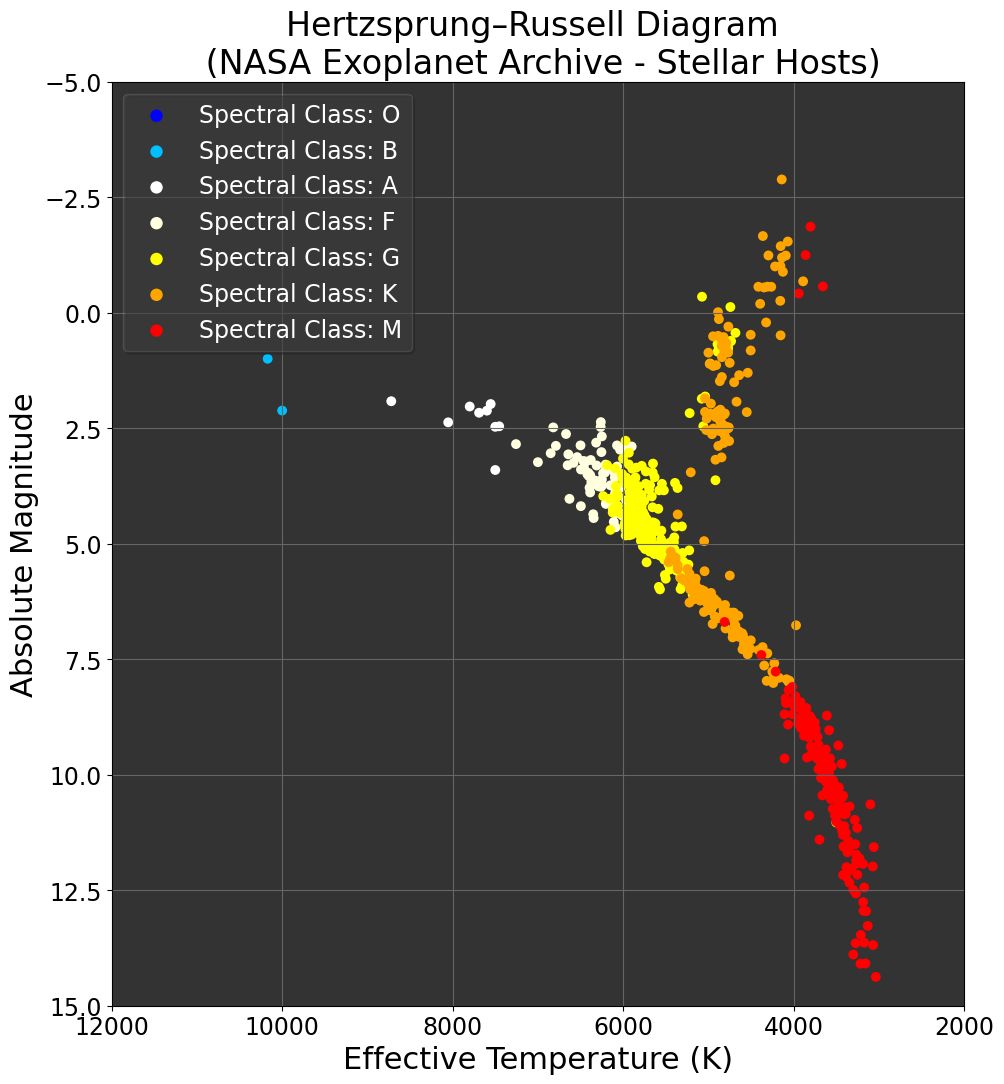

In [52]:
# Plot a H-R digram with Effective Temperature as the x axis and Absolute Magnitude as the y axis

fig = plt.figure(figsize=(11,12))
ax = fig.add_subplot(111, facecolor='0.2')

ax.set_xlim(12000, 2000)
ax.set_ylim(15, -5)
ax.grid(color='0.4')
ax.set_title('Hertzsprung–Russell Diagram \n (NASA Exoplanet Archive - Stellar Hosts)')
ax.title.set_fontsize(24)
ax.set_xlabel('Effective Temperature (K)')
ax.xaxis.label.set_fontsize(22)
ax.set_ylabel('Absolute Magnitude')
ax.yaxis.label.set_fontsize(22)

plot_stars(ax=ax,
           stellar_data=stellar_hosts_data,
           x_field='st_teff',
           y_field='abs_mag',
           spectral_field='st_spectype',
           is_x_as_int=False,
           size=50,
           edgecolors='none')

ax.tick_params(axis='both', labelsize=17)

legend = ax.legend(scatterpoints=1,
                   labelcolor='white',
                   loc='best',
                   fontsize=17,
                   markerscale=2,
                   shadow=True,
                   framealpha=0.15)
set_legend_size(legend, len(spectral_class_label), 80)

frame = legend.get_frame()
frame.set_facecolor('0.50')

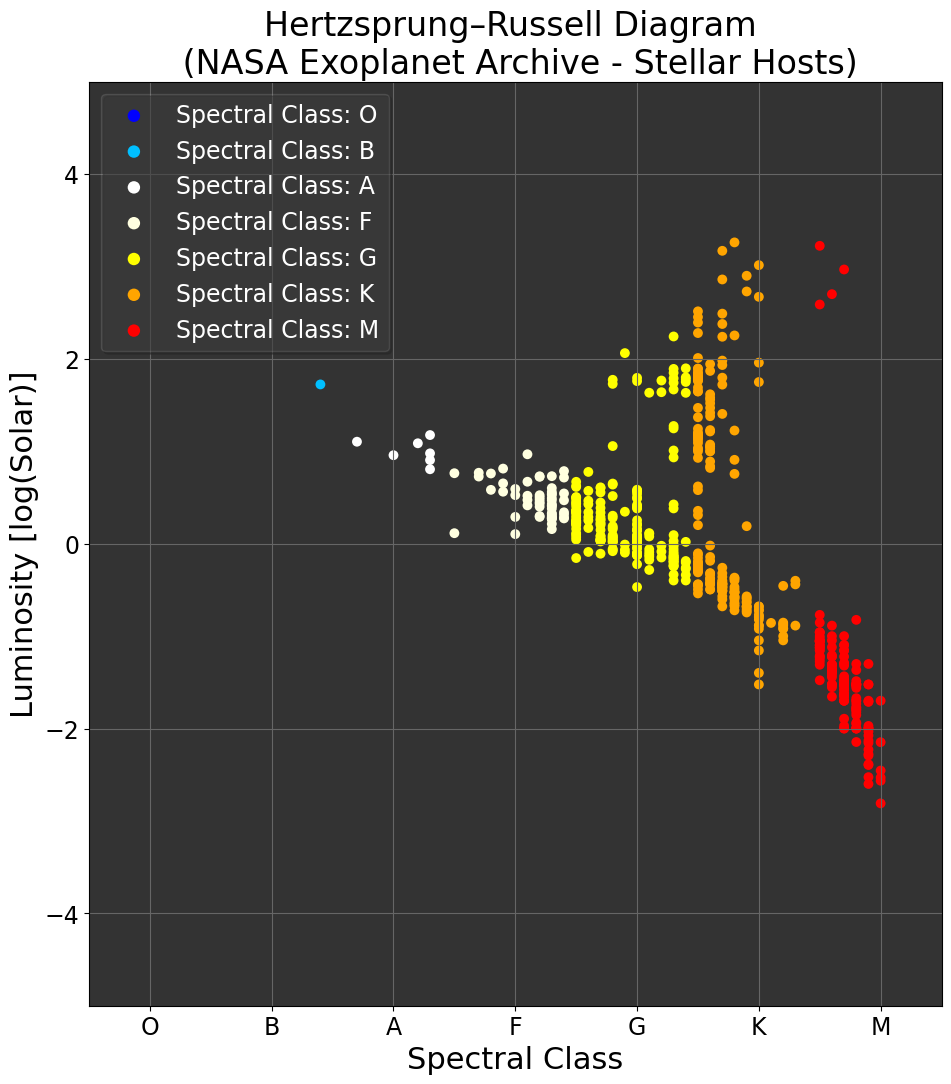

In [53]:
# Plot a H-R digram with Spectral Class as the x axis and Luminosity as the y axis

fig = plt.figure(figsize=(11,12))
ax = fig.add_subplot(111, facecolor='0.2')

ax.set_xlim(0, 70)
ax.set_ylim(-5, 5)
ax.grid(color='0.4')
ax.set_title('Hertzsprung–Russell Diagram \n (NASA Exoplanet Archive - Stellar Hosts)')
ax.title.set_fontsize(24)
ax.set_xlabel('Spectral Class')
ax.xaxis.label.set_fontsize(22)
ax.set_ylabel('Luminosity [log(Solar)]')
ax.yaxis.label.set_fontsize(22)

plot_stars(ax=ax,
           stellar_data=stellar_data_with_spec_short,
           x_field='st_spec_short',
           y_field='st_lum',
           spectral_field='st_spectype',
           is_x_as_int=True,
           size=50,
           edgecolors='none')

ax.set_xticks(range(5, 75, 10))
ax.set_xticklabels(['O', 'B', 'A', 'F', 'G', 'K', 'M'])
ax.tick_params(axis='both', labelsize=17)

legend = ax.legend(scatterpoints=1,
                   labelcolor='white',
                   loc='best',
                   fontsize = 17,
                   markerscale = 2,
                   shadow=True,
                   framealpha=0.15)
set_legend_size(legend, len(spectral_class_label), 80)

frame = legend.get_frame()
frame.set_facecolor('0.50')

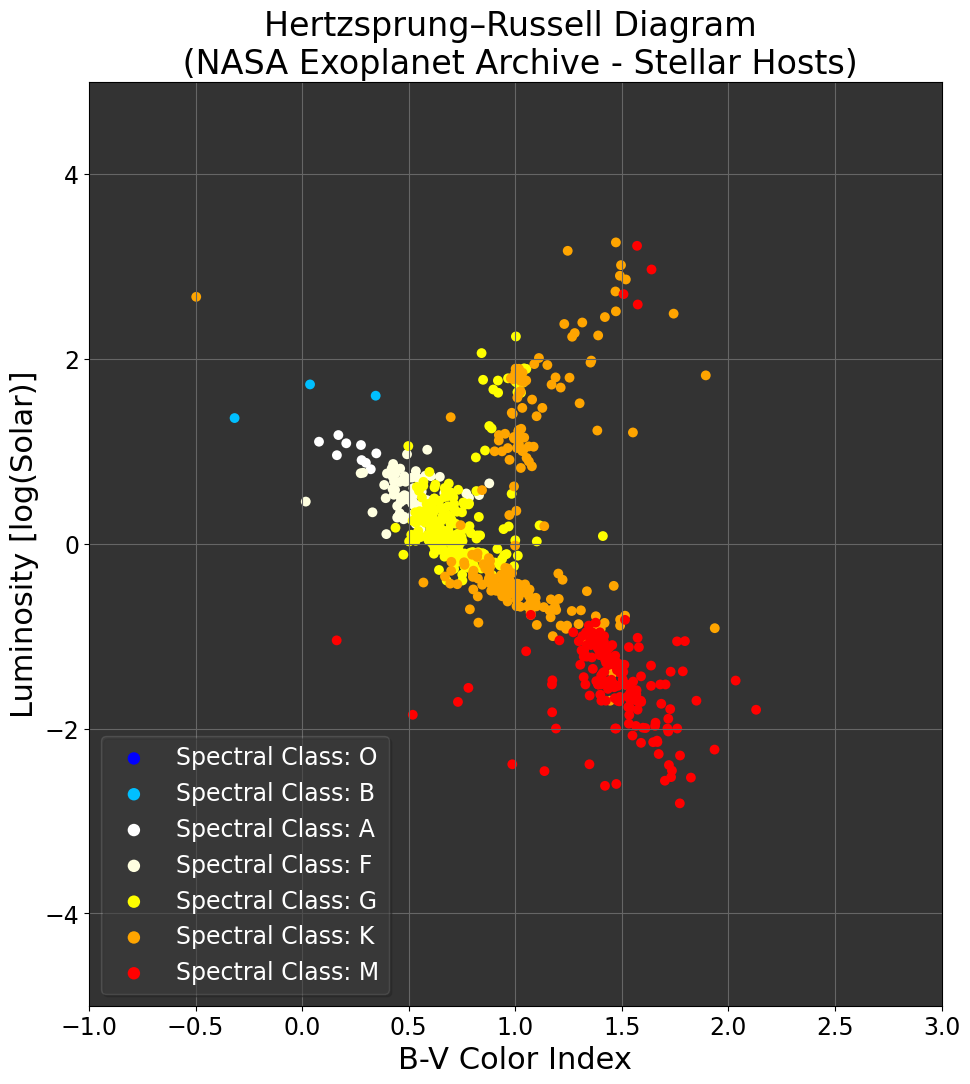

In [54]:
# Plot a H-R digram with B-V color index as the x axis and Luminosity as the y axis

fig = plt.figure(figsize=(11,12))
ax = fig.add_subplot(111, facecolor='0.2')

ax.set_xlim(-1.0, 3.0)
ax.set_ylim(-5, 5)
ax.grid(color='0.4')
ax.set_title('Hertzsprung–Russell Diagram \n (NASA Exoplanet Archive - Stellar Hosts)')
ax.title.set_fontsize(24)
ax.set_xlabel('B-V Color Index')
ax.xaxis.label.set_fontsize(22)
ax.set_ylabel('Luminosity [log(Solar)]')
ax.yaxis.label.set_fontsize(22)

plot_stars(ax=ax,
           stellar_data=stellar_hosts_data,
           x_field='b-v_index',
           y_field='st_lum',
           spectral_field='st_spectype',
           is_x_as_int=False,
           size=50,
           edgecolors='none')

ax.tick_params(axis='both', labelsize=17)

legend = ax.legend(scatterpoints=1,
                   labelcolor='white',
                   loc='best',
                   fontsize=17,
                   markerscale=2,
                   shadow=True,
                   framealpha=0.15)
set_legend_size(legend, len(spectral_class_label), 80)

frame = legend.get_frame()
frame.set_facecolor('0.50')

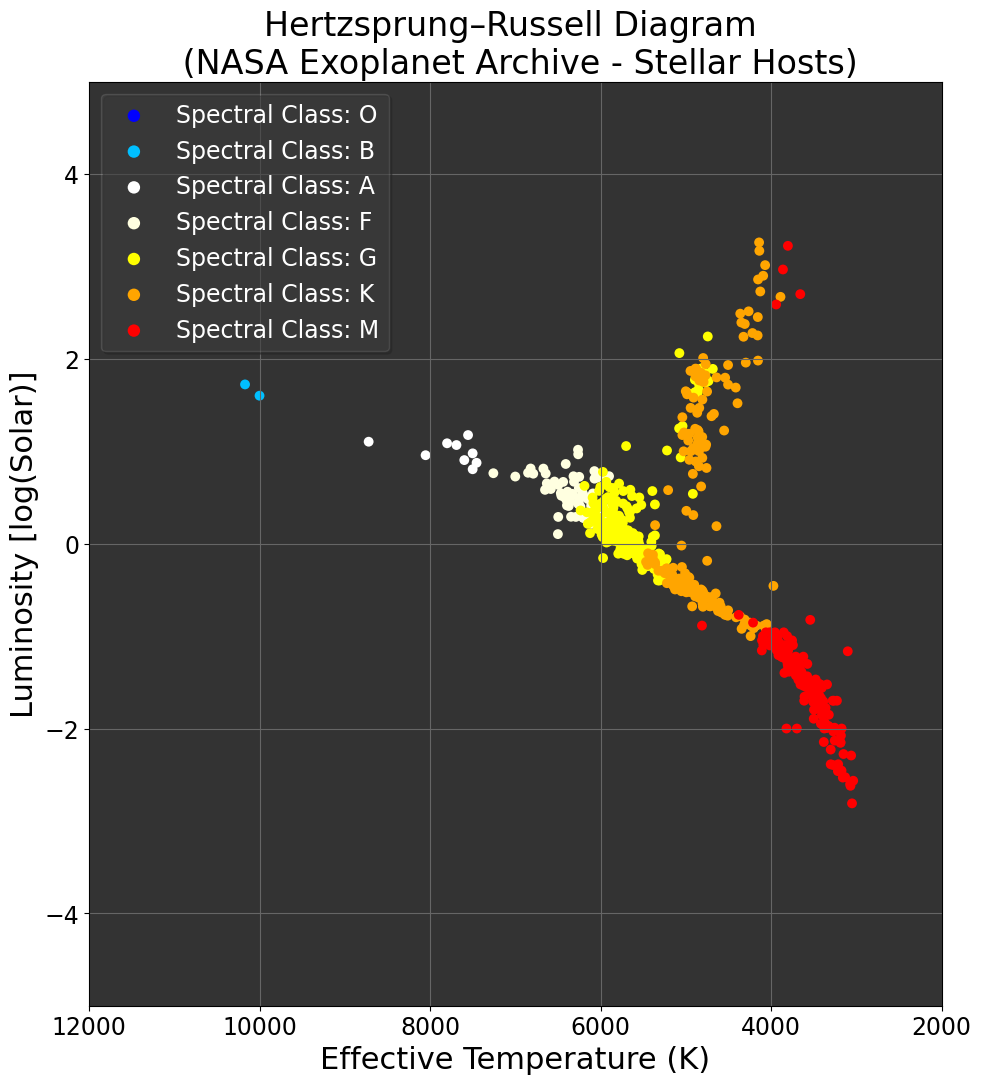

In [55]:
# Plot a H-R digram with Effective Temperature as the x axis and Luminosity as the y axis

fig = plt.figure(figsize=(11,12))
ax = fig.add_subplot(111, facecolor='0.2')

ax.set_xlim(12000, 2000)
ax.set_ylim(-5, 5)
ax.grid(color='0.4')
ax.set_title('Hertzsprung–Russell Diagram \n (NASA Exoplanet Archive - Stellar Hosts)')
ax.title.set_fontsize(24)
ax.set_xlabel('Effective Temperature (K)')
ax.xaxis.label.set_fontsize(22)
ax.set_ylabel('Luminosity [log(Solar)]')
ax.yaxis.label.set_fontsize(22)

plot_stars(ax=ax,
           stellar_data=stellar_hosts_data,
           x_field='st_teff',
           y_field='st_lum',
           spectral_field='st_spectype',
           is_x_as_int=False,
           size=50,
           edgecolors='none')

ax.tick_params(axis='both', labelsize=17)

legend = ax.legend(scatterpoints=1,
                   labelcolor='white',
                   loc='best',
                   fontsize=17,
                   markerscale=2,
                   shadow=True,
                   framealpha=0.15)
set_legend_size(legend, len(spectral_class_label), 80)

frame = legend.get_frame()
frame.set_facecolor('0.50')

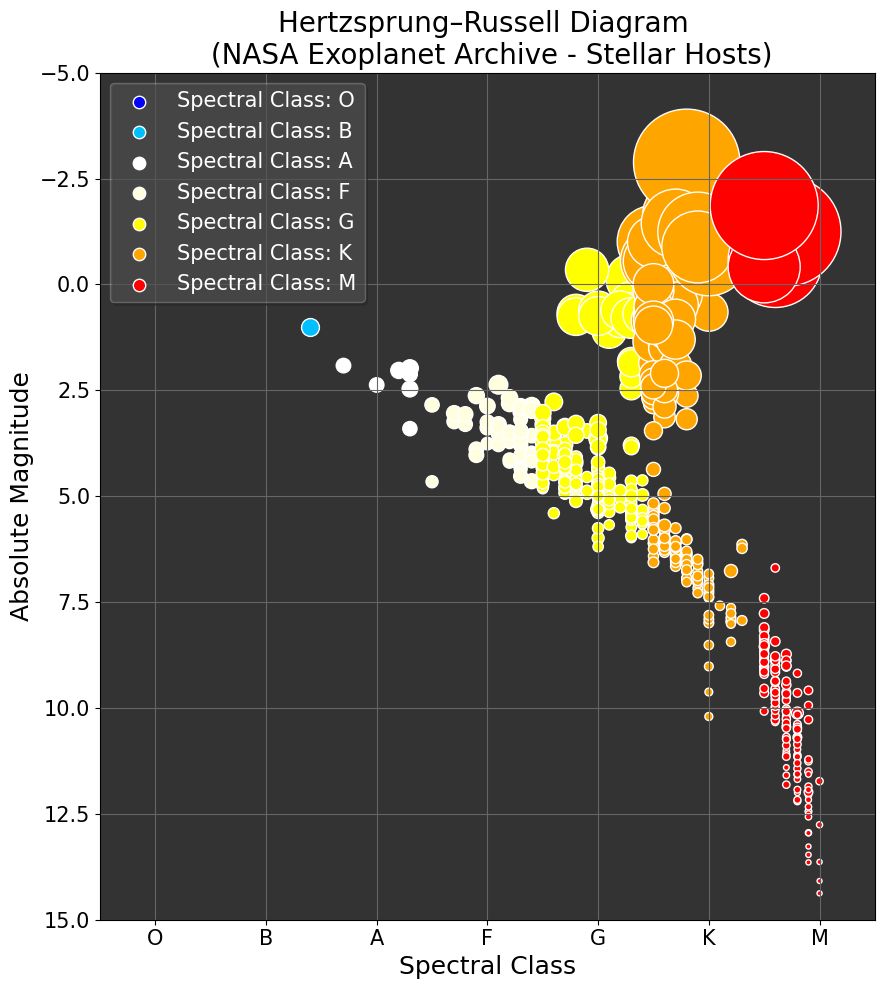

In [56]:
# Plot a H-R digram with Spectral Class as the x axis and Absolute Magnitude as the y axis

fig = plt.figure(figsize=(10,11))
ax = fig.add_subplot(111, facecolor='0.2')

ax.set_xlim(0, 70)
ax.set_ylim(15, -5)
ax.grid(color='0.4')
ax.set_title('Hertzsprung–Russell Diagram \n (NASA Exoplanet Archive - Stellar Hosts)')
ax.title.set_fontsize(20)
ax.set_xlabel('Spectral Class')
ax.xaxis.label.set_fontsize(18)
ax.set_ylabel('Absolute Magnitude')
ax.yaxis.label.set_fontsize(18)

plot_stars_with_size(ax=ax,
                     stellar_data=stellar_data_with_spec_short,
                     x_field='st_spec_short',
                     y_field='abs_mag',
                     size_field='st_rad',
                     spectral_field='st_spectype',
                     is_x_as_int=True,
                     scale_size=70,
                     edgecolors='white')

ax.set_xticks(range(5, 75, 10))
ax.set_xticklabels(['O', 'B', 'A', 'F', 'G', 'K', 'M'])
ax.tick_params(axis='both', labelsize=15)

legend = ax.legend(scatterpoints=1,
                   labelcolor='white',
                   loc='best',
                   fontsize=15,
                   markerscale=2,
                   shadow=True,
                   framealpha=0.3)
set_legend_size(legend, len(spectral_class_label), 80)

frame = legend.get_frame()
frame.set_facecolor('0.50')

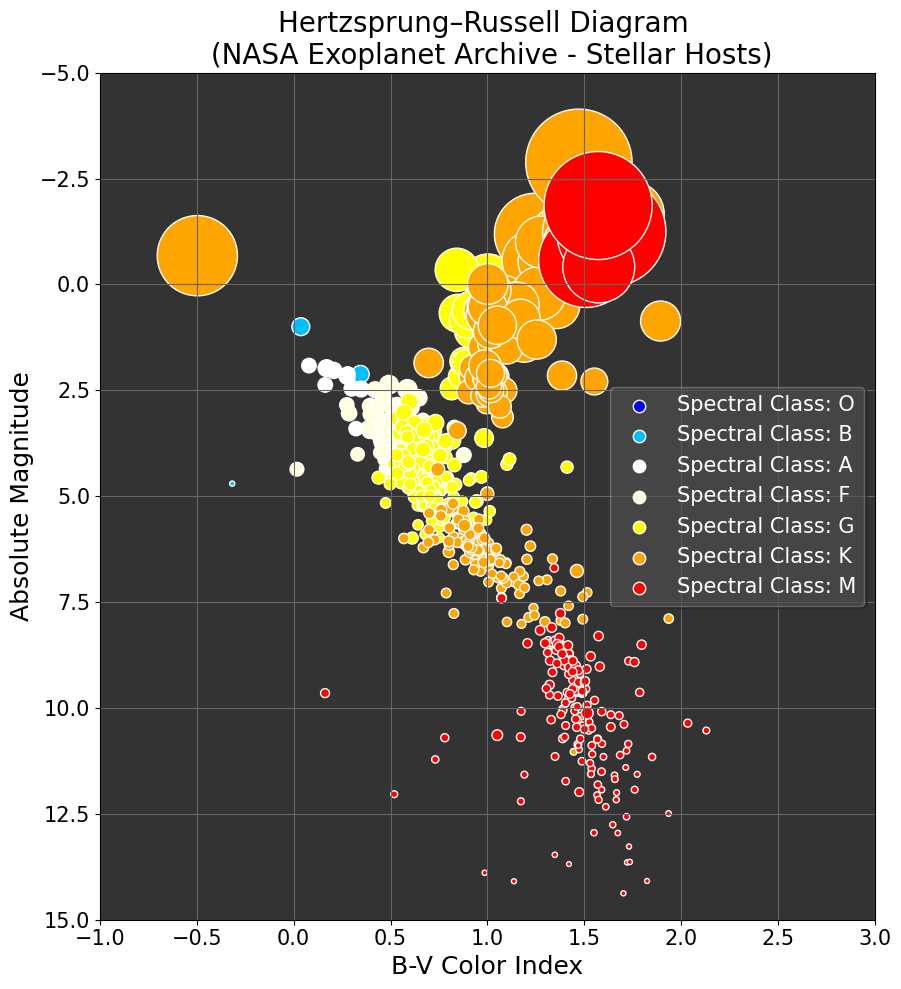

In [57]:
# Plot a H-R digram with B-V color index as the x axis and Absolute Magnitude as the y axis

fig = plt.figure(figsize=(10,11))
ax = fig.add_subplot(111, facecolor='0.2')

ax.set_xlim(-1.0, 3.0)
ax.set_ylim(15, -5)
ax.grid(color='0.4')
ax.set_title('Hertzsprung–Russell Diagram \n (NASA Exoplanet Archive - Stellar Hosts)')
ax.title.set_fontsize(20)
ax.set_xlabel('B-V Color Index')
ax.xaxis.label.set_fontsize(18)
ax.set_ylabel('Absolute Magnitude')
ax.yaxis.label.set_fontsize(18)

plot_stars_with_size(ax=ax,
                     stellar_data=stellar_hosts_data,
                     x_field='b-v_index',
                     y_field='abs_mag',
                     size_field='st_rad',
                     spectral_field='st_spectype',
                     is_x_as_int=False,
                     scale_size=70,
                     edgecolors='white')

ax.tick_params(axis='both', labelsize=15)

legend = ax.legend(scatterpoints=1,
                   labelcolor='white',
                   loc='best',
                   fontsize=15,
                   markerscale=2,
                   shadow=True,
                   framealpha=0.3)
set_legend_size(legend, len(spectral_class_label), 80)

frame = legend.get_frame()
frame.set_facecolor('0.50')

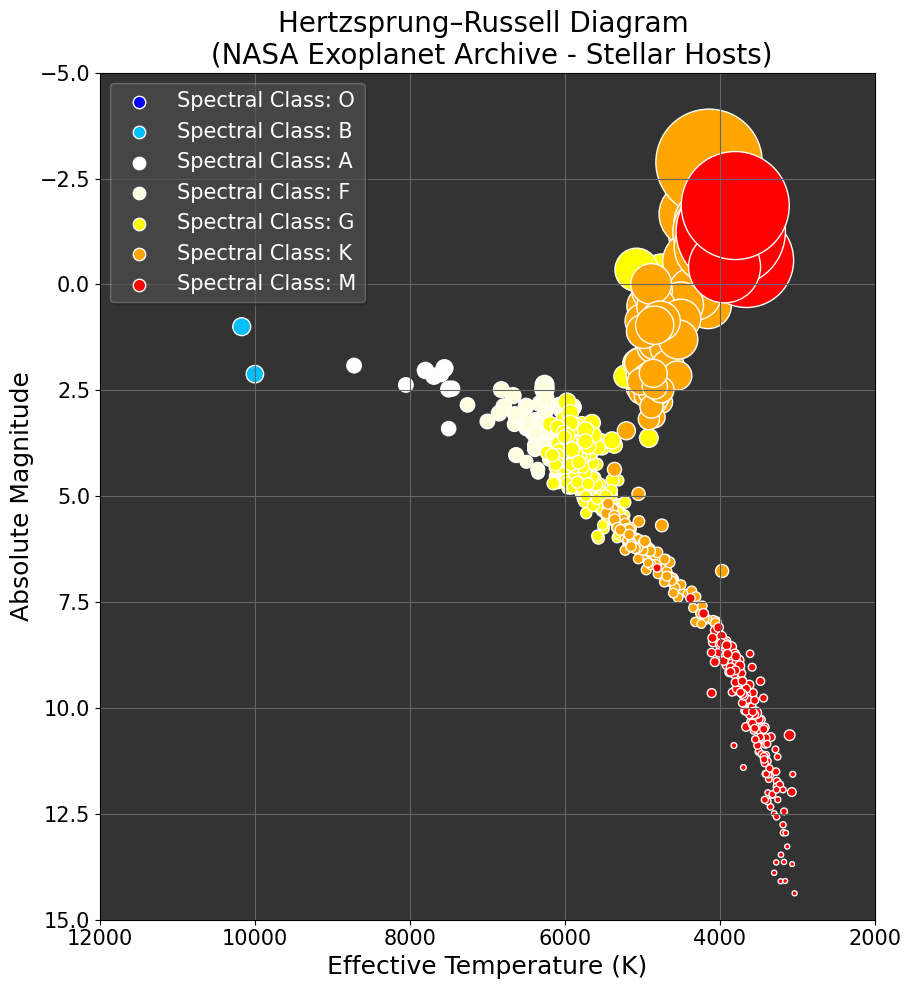

In [58]:
# Plot a H-R digram with Effective Temperature as the x axis and Absolute Magnitude as the y axis

fig = plt.figure(figsize=(10,11))
ax = fig.add_subplot(111, facecolor='0.2')

ax.set_xlim(12000, 2000)
ax.set_ylim(15, -5)
ax.grid(color='0.4')
ax.set_title('Hertzsprung–Russell Diagram \n (NASA Exoplanet Archive - Stellar Hosts)')
ax.title.set_fontsize(20)
ax.set_xlabel('Effective Temperature (K)')
ax.xaxis.label.set_fontsize(18)
ax.set_ylabel('Absolute Magnitude')
ax.yaxis.label.set_fontsize(18)

plot_stars_with_size(ax=ax,
                     stellar_data=stellar_hosts_data,
                     x_field='st_teff',
                     y_field='abs_mag',
                     size_field='st_rad',
                     spectral_field='st_spectype',
                     is_x_as_int=False,
                     scale_size=70,
                     edgecolors='white')

ax.tick_params(axis='both', labelsize=15)

legend = ax.legend(scatterpoints=1,
                   labelcolor='white',
                   loc='best',
                   fontsize=15,
                   markerscale=2,
                   shadow=True,
                   framealpha=0.3)
set_legend_size(legend, len(spectral_class_label), 80)

frame = legend.get_frame()
frame.set_facecolor('0.50')

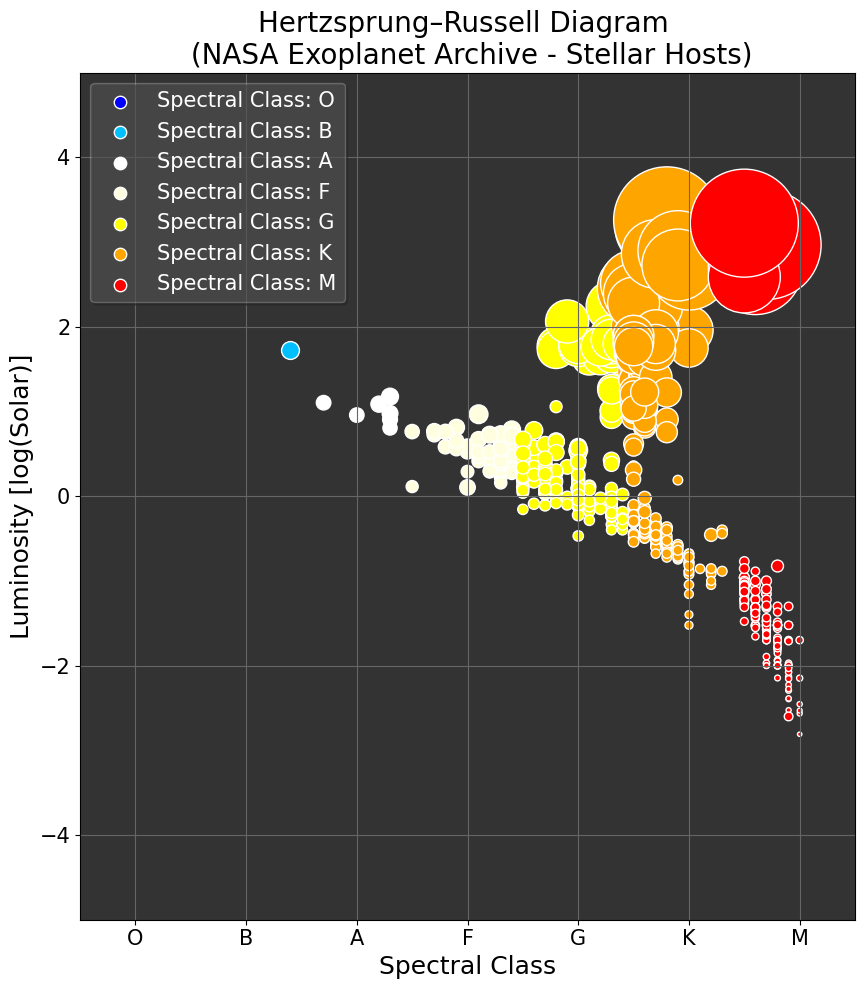

In [59]:
# Plot a H-R digram with Spectral Class as the x axis and Luminosity as the y axis

fig = plt.figure(figsize=(10,11))
ax = fig.add_subplot(111, facecolor='0.2')

ax.set_xlim(0, 70)
ax.set_ylim(-5, 5)
ax.grid(color='0.4')
ax.set_title('Hertzsprung–Russell Diagram \n (NASA Exoplanet Archive - Stellar Hosts)')
ax.title.set_fontsize(20)
ax.set_xlabel('Spectral Class')
ax.xaxis.label.set_fontsize(18)
ax.set_ylabel('Luminosity [log(Solar)]')
ax.yaxis.label.set_fontsize(18)

plot_stars_with_size(ax=ax,
                     stellar_data=stellar_data_with_spec_short,
                     x_field='st_spec_short',
                     y_field='st_lum',
                     size_field='st_rad',
                     spectral_field='st_spectype',
                     is_x_as_int=True,
                     scale_size=70,
                     edgecolors='white')

ax.set_xticks(range(5, 75, 10))
ax.set_xticklabels(['O', 'B', 'A', 'F', 'G', 'K', 'M'])
ax.tick_params(axis='both', labelsize=15)

legend = ax.legend(scatterpoints=1,
                   labelcolor='white',
                   loc='best',
                   fontsize=15,
                   markerscale=2,
                   shadow=True,
                   framealpha=0.3)
set_legend_size(legend, len(spectral_class_label), 80)

frame = legend.get_frame()
frame.set_facecolor('0.50')

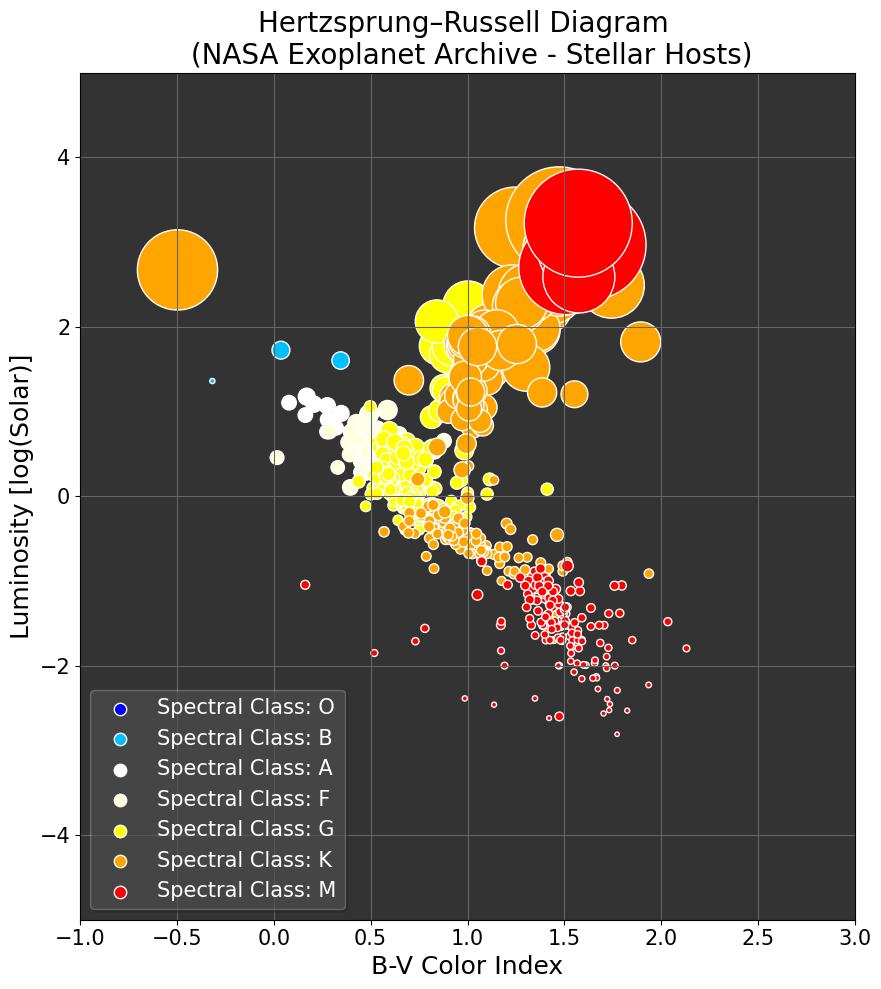

In [60]:
# Plot a H-R digram with B-V color index as the x axis and Luminosity as the y axis

fig = plt.figure(figsize=(10,11))
ax = fig.add_subplot(111, facecolor='0.2')

ax.set_xlim(-1.0, 3.0)
ax.set_ylim(-5, 5)
ax.grid(color='0.4')
ax.set_title('Hertzsprung–Russell Diagram \n (NASA Exoplanet Archive - Stellar Hosts)')
ax.title.set_fontsize(20)
ax.set_xlabel('B-V Color Index')
ax.xaxis.label.set_fontsize(18)
ax.set_ylabel('Luminosity [log(Solar)]')
ax.yaxis.label.set_fontsize(18)

plot_stars_with_size(ax=ax,
                     stellar_data=stellar_hosts_data,
                     x_field='b-v_index',
                     y_field='st_lum',
                     size_field='st_rad',
                     spectral_field='st_spectype',
                     is_x_as_int=False,
                     scale_size=70,
                     edgecolors='white')

ax.tick_params(axis='both', labelsize=15)

legend = ax.legend(scatterpoints=1,
                   labelcolor='white',
                   loc='best',
                   fontsize=15,
                   markerscale=2,
                   shadow=True,
                   framealpha=0.3)
set_legend_size(legend, len(spectral_class_label), 80)

frame = legend.get_frame()
frame.set_facecolor('0.50')

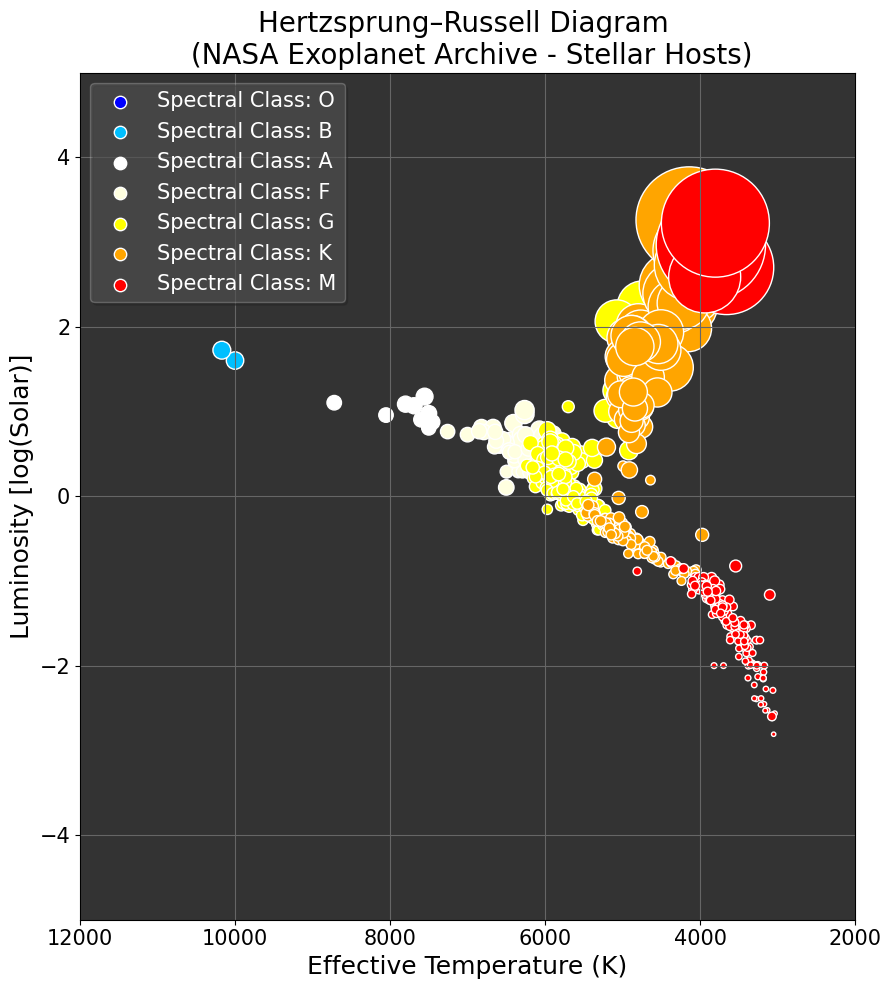

In [61]:
# Plot a H-R digram with Effective Temperature as the x axis and Luminosity as the y axis

fig = plt.figure(figsize=(10,11))
ax = fig.add_subplot(111, facecolor='0.2')

ax.set_xlim(12000, 2000)
ax.set_ylim(-5, 5)
ax.grid(color='0.4')
ax.set_title('Hertzsprung–Russell Diagram \n (NASA Exoplanet Archive - Stellar Hosts)')
ax.title.set_fontsize(20)
ax.set_xlabel('Effective Temperature (K)')
ax.xaxis.label.set_fontsize(18)
ax.set_ylabel('Luminosity [log(Solar)]')
ax.yaxis.label.set_fontsize(18)

plot_stars_with_size(ax=ax,
                     stellar_data=stellar_hosts_data,
                     x_field='st_teff',
                     y_field='st_lum',
                     size_field='st_rad',
                     spectral_field='st_spectype',
                     is_x_as_int=False,
                     scale_size=70,
                     edgecolors='white')

ax.tick_params(axis='both', labelsize=15)

legend = ax.legend(scatterpoints=1,
                   labelcolor='white',
                   loc='best',
                   fontsize=15,
                   markerscale=2,
                   shadow=True,
                   framealpha=0.3)
set_legend_size(legend, len(spectral_class_label), 80)

frame = legend.get_frame()
frame.set_facecolor('0.50')

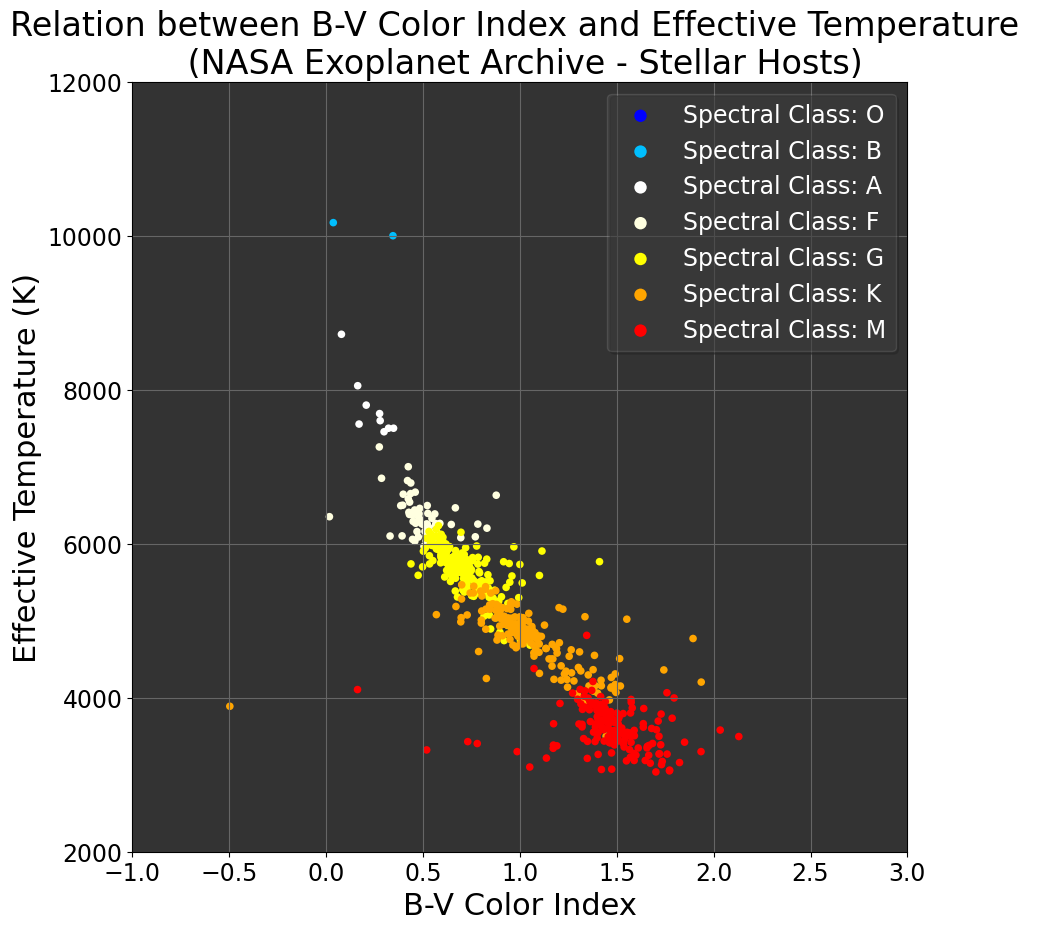

In [62]:
# Plot a digram with B-V Color Index as the x axis and Effective Temperature as the y axis

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, facecolor='0.2')

ax.set_xlim(-1.0, 3.0)
ax.set_ylim(2000, 12000)
ax.grid(color='0.4')
ax.set_title('Relation between B-V Color Index and Effective Temperature \n (NASA Exoplanet Archive - Stellar Hosts)')
ax.title.set_fontsize(24)
ax.set_xlabel('B-V Color Index')
ax.xaxis.label.set_fontsize(22)
ax.set_ylabel('Effective Temperature (K)')
ax.yaxis.label.set_fontsize(22)

plot_stars(ax=ax,
           stellar_data=stellar_hosts_data,
           x_field='b-v_index',
           y_field='st_teff',
           spectral_field='st_spectype',
           is_x_as_int=False,
           size=30,
           edgecolors='none')

ax.tick_params(axis='both', labelsize=17)

legend = ax.legend(scatterpoints=1,
                   labelcolor='white',
                   loc='best',
                   fontsize=17,
                   markerscale=2,
                   shadow=True,
                   framealpha=0.15)
set_legend_size(legend, len(spectral_class_label), 80)

frame = legend.get_frame()
frame.set_facecolor('0.50')